# Instacart Dataset

For this report we looked at an Instacart dataset that was publicly released by Instacart in 2017 for a Kaggle Competition.

Our goal for this report is to clean up the dataset by removing duplicates and discovering missing values to give insight into shopping habits of Instacart customers.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_insta_orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')

In [3]:
df_prods = pd.read_csv('/datasets/products.csv', sep = ';')

In [4]:
df_order_prods = pd.read_csv('/datasets/order_products.csv', sep = ';')

In [5]:
df_aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')

In [6]:
df_depts = pd.read_csv('/datasets/departments.csv', sep = ';')

In [7]:
df_insta_orders.info()
df_prods.info()
df_order_prods.info(show_counts = True)
df_aisles.info()
df_depts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage:

The data is broken up into five datasets:

`'df_insta_orders'` - contains six columns:
- `'order_id'`: ID number that uniquely identifies each order (int64 type)
- `'user_id'`: ID number that uniquely identifies each customer account (int64 type)
- `'order_number'`: the number of times this customer has placed an order (int64 type)
- `'order_dow'`: day of the week that the order placed (which day is 0 is uncertain) (int64 type)
- `'order_hour_of_day'`: hour of the day that the order was placed (int64 type)
- `'days_since_prior_order'`: number of days since this customer placed their previous order (float64 type)

The number of column values is different. This means the data contains missing values.

`'df_prods'` - contains four columns:
- `'product_id'`: ID number that uniquely identifies each product (int64 type)
- `'product_name'`: name of the product (object type)
- `'aisle_id'`: ID number that uniquely identifies each grocery aisle category (int64 type)
- `'department_id'`: ID number that uniquely identifies each grocery department category (int64 type)

The number of column values is different. This means the data contains missing values.

`'df_order_prods'` - contains four columns:
- `'order_id'`: ID number that uniquely identifies each order (int64 type)
- `'product_id'`: ID number that uniquely identifies each product (int64 type)
- `'add_to_cart_order'`: the sequential order in which each item was placed in the cart (float64 type)
- `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have (int64 type)

The number of column values is different. This means the data contains missing values.

`'df_aisles'` - contains two columns:
- `'aisle_id'`: ID number that uniquely identifies each grocery aisle category (int64 type)
- `'aisle'`: name of the aisle (object type)

`'df_depts'` - contains two columns:
- `'department_id'`: ID number that uniquely identifies each grocery department category (int64 type)
- `'department'`: name of the department (object type)


We can already see that in three of the five datasets there are missing values.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
# Check for duplicated orders
display(df_insta_orders.duplicated().sum())
duplicated_df_insta_orders = df_insta_orders[df_insta_orders.duplicated()]
display(duplicated_df_insta_orders)

15

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [9]:
# Check for all orders placed Wednesday at 2:00 AM
wed_2am = df_insta_orders[(df_insta_orders['order_dow'] == 3) & (df_insta_orders['order_hour_of_day'] == 2)]
display(wed_2am.head(15))
display()
display(wed_2am.info())


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
25376,1378085,75705,21,3,2,5.0
26301,2846262,176827,2,3,2,30.0
29129,353088,46038,4,3,2,11.0
30371,1918001,188546,14,3,2,16.0
31404,1725788,147843,10,3,2,30.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB


None

In [10]:
# Remove duplicate orders
df_insta_orders = df_insta_orders.drop_duplicates()

In [11]:
# Double check for duplicate rows
display(df_insta_orders.duplicated().sum())

0

In [12]:
# Double check for duplicate order IDs only
display(df_insta_orders['order_id'].duplicated().sum())

0

In [13]:
df_insta_orders = df_insta_orders.drop_duplicates(subset = 'order_id')
display(df_insta_orders['order_id'].duplicated().sum())

0

By removing the duplicate rows, we can draw more accurate conclusions on the data.

### `products` data frame

In [14]:
# Check for fully duplicate rows
display(df_prods.duplicated().sum())

0

In [15]:
# Check for just duplicate product IDs
display(df_prods['product_id'].duplicated().sum())

0

In [16]:
# Check for just duplicate product names (convert names to lowercase to compare better)
prod_name_dup = df_prods['product_name'].str.lower().duplicated().sum()
display(prod_name_dup)

1361

In [17]:
# Check for duplicate product names that aren't missing
display(prod_name_dup - (df_prods['product_name'].isna().sum()))

103

The `'products'` dataset contains no completely duplicated rows and 1361 duplicated product names, with 103 of those being non-missing values. Since a specific product can be ordered by a multitude of people, it is not necessary to remove them.

### `departments` data frame

In [18]:
display(df_depts.info()) #getting a quick overview at the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


None

In [19]:
display(df_depts.duplicated().sum()) #checking for duplicated rows

0

The `'departments'` dataset contains no completely duplicated rows.

### `aisles` data frame

In [20]:
display(df_aisles.info()) #getting a quick overview at the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

In [21]:
display(df_aisles.duplicated().sum()) #checking for duplicated rows

0

Similar to the `'departments'` dataset, this dataset does not contain any completely duplicated rows and it is not necessary to check for duplicate values in the `'aisle_id'` or `'aisle'` columns individually as their repition will not affect our calculations.

### `order_products` data frame

In [22]:
# Check for fully duplicate rows
display(df_order_prods.duplicated().sum())

0

In [23]:
# Double check for any other tricky duplicates
display(df_order_prods['order_id'].duplicated().sum())
display(df_order_prods['product_id'].duplicated().sum())

4094961

4499434

In [24]:
display(df_order_prods.duplicated(subset=['order_id', 'product_id']).sum())

0

There are not any completely duplicated rows in the `'order_products'` dataset, but there were many duplicates in the `'order_id'`  and `'product_id'` column. Since each order id number attributes to only one line for each product, and each product may be ordered multiple times, it is import not to remove these duplicates.

## Find and remove missing values


### `products` data frame

In [25]:
display(df_prods.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [26]:
# Are all of the missing product names associated with aisle ID 100?
display((df_prods['aisle_id'] == 100).value_counts(dropna = False))

False    48436
True      1258
Name: aisle_id, dtype: int64

In [27]:
# Are all of the missing product names associated with department ID 21?
display((df_prods['department_id'] == 21).value_counts(dropna = False))

False    48436
True      1258
Name: department_id, dtype: int64

In [28]:
display(df_prods[df_prods['department_id'] == 21].isna().sum())
display(df_prods[df_prods['aisle_id'] == 100].isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [29]:
df_prods[df_prods['department_id'] == 21].isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [30]:
# What is this ailse and department?
display(df_aisles[df_aisles['aisle_id'] == 100])
display(df_depts[df_depts['department_id'] == 21])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


In [31]:
# Fill missing product names with 'Unknown'
df_prods['product_name'] = df_prods['product_name'].fillna('Unknown')
display(df_prods[(df_prods['aisle_id'] == 100) & (df_prods['department_id'] == 21)])

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


Not all missing values affect the research, but missing values in `'product_id'` can affect the comparison of product preferences in the dataset. By renaming them 'Unknown' we can categorize them easier later in our code.

Since all of the missing values came from the same aisle and department, it is likely there is a product not being read correctly in how it is collected in the original data.

### `orders` data frame

In [32]:
display(df_insta_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [33]:
# Are there any missing values where it's not a customer's first order?
display(df_insta_orders[df_insta_orders['order_number'] == 1].isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

There are 28,817 missing values in the `'days_since_prior_order'` column of the `'instas_orders'` dataset. All of these missing values come from where it is a customer's first order. Because of this, there have not been any days to compute for the original dataset causing the missing value.

### `order_products` data frame

In [34]:
display(df_order_prods.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [35]:
# What are the min and max values in this column?
display(df_order_prods['add_to_cart_order'].min())
display(df_order_prods['add_to_cart_order'].max())

1.0

64.0

In [36]:
#Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_order = df_order_prods[df_order_prods['add_to_cart_order'].isna()]['order_id'].unique()

missed_count = df_order_prods.groupby('order_id')['order_id'].count()
display(missed_count)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: order_id, Length: 450046, dtype: int64

In [37]:
# Select then all the entries attributed to those order IDs into a separate dataframe.
df_with_missing_orders = df_order_prods[df_order_prods['order_id'].isin(missing_order)]

# Group this new dataframe by order ID and check sizes of those groups - to find the minimum size.
df_with_missing_orders.groupby('order_id').size().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Length: 70, dtype: int64

In [39]:
# Replace missing values with 999 and convert column to integer type
df_order_prods['add_to_cart_order'] = df_order_prods['add_to_cart_order'].fillna(999).astype('int')

In the `'df_order_prods'` dataset there were 11 missing values found in the `'add_to_cart_order'` column. We searched for the minimum and maximum value in this column and decided to use '999' to represent the missing values. By replacing the values to '999' and changing them to an integer type we are able to do calculations much easier with the column as a whole, and still distinguish between them and the non-missing values.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [40]:
display(sorted(df_insta_orders['order_hour_of_day'].unique()))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [41]:
display(sorted(df_insta_orders['order_dow'].unique()))

[0, 1, 2, 3, 4, 5, 6]

The `'order_hour_of_day'` column contains values 0 through 23 with 0 equal to midnight and 23 equal to 11:00pm, accounting for all hours of the day. The `'order_dow'` column conatins values 0 through 6 for each day of the week in order with 0 representing Sunday and 6 representing Saturday.

### [A2] What time of day do people shop for groceries?

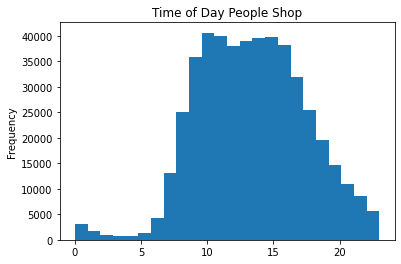

In [42]:
df_insta_orders['order_hour_of_day'].plot(kind = 'hist', bins = 24, title = 'Time of Day People Shop')

plt.show()

Looking at the graph we can see that people are doing the most shopping between 10:00 am and around 3:00 pm.

### [A3] What day of the week do people shop for groceries?

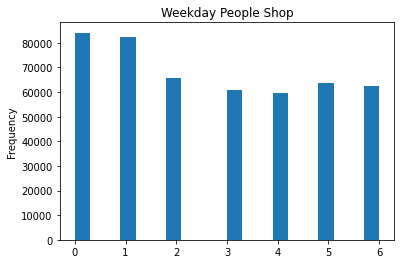

In [43]:
df_insta_orders['order_dow'].plot(kind = 'hist', bins = 20, title = 'Weekday People Shop')

plt.show()

This graph shows that people shop more on Sunday and Monday, but the rest of the weekdays are pretty similar to the amount of people shopping.

### [A4] How long do people wait until placing another order?

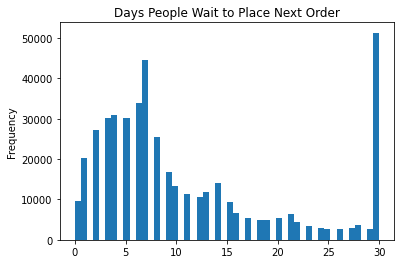

In [44]:
df_insta_orders['days_since_prior_order'].plot(kind = 'hist', bins = 50, title = 'Days People Wait to Place Next Order')

plt.show()

This graph shows that people are more likely to reorder their groceries around 30 days (monthly) while they are least likely to order 25 days after their last order.

In [45]:
display(df_insta_orders['days_since_prior_order'].describe())

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

Using the `'describe()'` method allows us to see the minimum and maximum values of the data as well as the average. It looks like the average shopper is ordering after 7 days (weekly) while the max amount of days a shopper is waiting before ordering again is 30 days (ordering monthly).

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [47]:
df_ohod_wed = df_insta_orders[df_insta_orders['order_dow'] == 3]

In [48]:
df_ohod_sat = df_insta_orders[df_insta_orders['order_dow'] == 6]

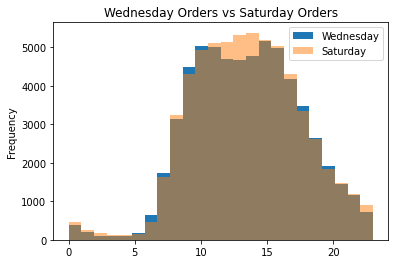

In [49]:
df_ohod_wed['order_hour_of_day'].plot(kind='hist', 
                                      bins = 24,
                                      title = 'Wednesday Orders vs Saturday Orders',
                                      xlabel = 'Hour of Day',
                                      ylabel = 'Frequency'
                                     )
df_ohod_sat['order_hour_of_day'].plot(kind = 'hist', bins = 24, alpha = 0.5)
plt.legend(['Wednesday', 'Saturday'])
plt.show()

By looking at the histogram, we can see that Wednesday and Saturday shoppers are fairly similar in the time of day that they shop.

### [B2] What's the distribution for the number of orders per customer?

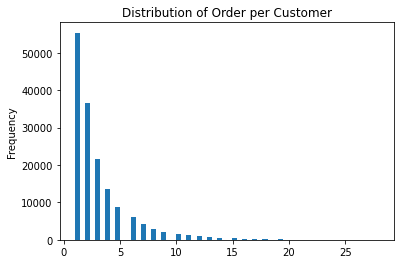

In [51]:
df_insta_orders['user_id'].value_counts().plot(kind = 'hist',
                                              bins = 60,
                                              title = 'Distribution of Order per Customer'
                                              )
plt.show()

In [52]:
display(df_insta_orders['user_id'].value_counts(ascending = True))

2047       1
164349     1
42334      1
178682     1
186870     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: user_id, Length: 157437, dtype: int64

Looking at the graph we can see that most shoppers are purchasing only one item with very little ordering over 15 items.

### [B3] What are the top 20 popular products (display their id and name)?

In [53]:
top_20 = df_order_prods.merge(df_prods)

In [54]:
top_20_df = top_20.groupby(['product_name', 'product_id']).size().sort_values(ascending = False)

In [55]:
display(top_20_df.head(20))

product_name              product_id
Banana                    24852         66050
Bag of Organic Bananas    13176         53297
Organic Strawberries      21137         37039
Organic Baby Spinach      21903         33971
Organic Hass Avocado      47209         29773
Organic Avocado           47766         24689
Large Lemon               47626         21495
Strawberries              16797         20018
Limes                     26209         19690
Organic Whole Milk        27845         19600
Organic Raspberries       27966         19197
Organic Yellow Onion      22935         15898
Organic Garlic            24964         15292
Organic Zucchini          45007         14584
Organic Blueberries       39275         13879
Cucumber Kirby            49683         13675
Organic Fuji Apple        28204         12544
Organic Lemon             5876          12232
Apple Honeycrisp Organic  8277          11993
Organic Grape Tomatoes    40706         11781
dtype: int64

It looks like the most popular products are bananas.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [60]:
merge = df_order_prods.merge(df_prods, on='product_id')

merge[merge['reordered'] == 1][['product_id', 'product_name']].value_counts().head(20)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [64]:
merge = df_order_prods.merge(df_prods, on='product_id')

merge[merge['add_to_cart_order'] == 1][['product_id', 'product_name']].value_counts().head(20)

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      

# Conclusion

From our results we can see that people are doing the most shopping between 10:00 am and around 3:00 pm,and that people shop more on Sunday and Monday. People are more likely to reorder their groceries around 30 days (monthly) while they are least likely to order 25 days after their last order, with most shoppers purchasing only one item and very little ordering over 15 items.

The most popular products are bananas, with these being the most reordered product and the top product people are adding to their cart first.